In [1]:
#14/01/2022
#pyTorch intro
#https://www.youtube.com/watch?v=kPa6hU9prg4&list=PL_iWQOsE6TfXxKgI1GgyV1B_Xa0DxE5eH&index=13
#https://www.youtube.com/watch?v=ubSsUJbLkwM&list=PL_iWQOsE6TfXxKgI1GgyV1B_Xa0DxE5eH&index=13

# Teoría

Funciones implícitas:
$$x^2+y^2=1$$
$$y=\sqrt{1-x^2}$$
$$f(x,y,z)=x^2+y^2+z^2-1$$

$$f_\theta(x)$$
$$f(\theta,x)$$

Ecuación de recta
$$y=mx+b$$

## Datos

$$x=\{x_1,x_2,...,x_N\}$$
$$y=\{y_1,y_2,...,y_N\}$$

Queremos buscar un $\theta$ que cumpla las igualdades siguientes:

$$f(\theta,x_1)\simeq y_1$$
$$f(\theta,x_2)\simeq y_2$$
$$...$$
$$f(\theta,x_N)\simeq y_N$$

## Modelos

Modelo lineal
$$lin(\theta,x)=\theta x=\theta[1]x[1]+\theta[2]x[2]+...+\theta[D]x[D]$$

$$a(x)=sig(x)=\frac{1}{1+e^{-x}}$$

$$f(\theta,x)=a(lin(\theta,x))$$

Deep learning es anidar funciones:
$$f_1(\theta_1,x)=a(lin(\theta_1,x))$$
$$f_2(\theta_2,\theta_1,x)=a(lin(\theta_2,f_1(\theta_1,x)))$$
$$f_3(\theta_3,\theta_2,\theta_1,x)=a(lin(\theta_3,f_2(\theta_2,x)))$$
$$f_3(\theta_3,\theta_2,\theta_1,x)=a(lin(\theta_3,f_2(\theta_2,f_1(\theta_1,x))))=a(lin(\theta_3,a(lin(\theta_2,a(lin(\theta_1,x)))$$

Optimización:
$$r(\theta_{h1},x_1,y_1)=f(\theta_1,x_1)-y_1$$
$$r(\theta_{h1},x_2,y_2)=f(\theta_2,x_2)-y_2$$
$$...$$
$$r(\theta_{h1},x_N,y_N)=f(\theta_N,x_N)-y_N$$
$$\mathcal{L}(\theta_{h1},x,y)=r(\theta_{h1},x_1,y_1)^2+r(\theta_{h1},x_2,y_2)^2+...+r(\theta_{h1},x_N,y_N)^2=\sum_{i=1}^N r(\theta_{h1},x_i,y_i)^2$$


$$\theta_{h2}=\theta_{h1}+0.001$$
$$\mathcal{L}(\theta_{h2},x,y)>\mathcal{L}(\theta_{h1},x,y)$$
$$\theta_{h3}<\theta_{h1}$$
$$\mathcal{L}(\theta_{h2},x,y)-\mathcal{L}(\theta_{h1},x,y)$$


Definición de derivadas/cuestas/gradientes/jacobianos/pendiente/tangencial,...:
$$f(\theta)$$
$$g(\theta)=\frac{\partial{f(\theta)}}{\partial{\theta}}=lim_{h\rightarrow0}\frac{f(\theta+h)-f(\theta)}{h}\simeq \frac{f(\theta+h)-f(\theta)}{h}$$


Descenso de gradientes
$$\theta_{new}=\theta_{old}-\alpha·g(\theta_{old},x,y)=\theta_{old}-\alpha\frac{\partial{\mathcal{L}(\theta_{old},x,y)}}{\partial{\theta_{old}}}$$

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.distributions as distributions
import torch.nn.functional as F

def plot(xs, ys, xlim=(-3, 3), ylim=(-3, 3)):
  fig, ax = plt.subplots()
  ax.plot(xs, ys, linewidth=5)
  # ax.set_aspect('equal')
  ax.grid(True, which='both')
  
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.set_xlim(*xlim)
  ax.set_ylim(*ylim)

# Intro numpy

In [3]:
x=np.array([1,2,3,4,5,6])
y=np.array([[8,0,7],[3,0,1]])
z=np.random.rand(3,2,3)
print(x)
print(y)
print(z)
print(x.shape)
print(y.shape)
print(z.shape)

[1 2 3 4 5 6]
[[8 0 7]
 [3 0 1]]
[[[0.19823901 0.01757563 0.26406357]
  [0.55374254 0.73914879 0.42705949]]

 [[0.8140745  0.43255336 0.1435383 ]
  [0.87564796 0.84456651 0.59831962]]

 [[0.10270491 0.84589181 0.56287989]
  [0.64033794 0.02341209 0.65235426]]]
(6,)
(2, 3)
(3, 2, 3)


In [4]:
print(z[0])

[[0.19823901 0.01757563 0.26406357]
 [0.55374254 0.73914879 0.42705949]]


In [5]:
print(z[0,1])

[0.55374254 0.73914879 0.42705949]


In [6]:
print(z[0,1,2])

0.4270594949174702


In [7]:
print(z[:,:,2])

[[0.26406357 0.42705949]
 [0.1435383  0.59831962]
 [0.56287989 0.65235426]]


In [8]:
x_np=np.random.randn(2,3)
print(x_np)

[[ 0.09085875  0.64210754  0.66995209]
 [ 0.43497378 -1.16049538 -0.53581849]]


In [78]:
d=np.arange(1,21,1)
print(d)
x=d.reshape(1,2,2,5)
print(x)
x=d.reshape(5,4)
print(x)
# Las dimensiones deben permitir que lo datos quepan exactamente
# x=d.reshape(3,7)
# print(x)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[[[[ 1  2  3  4  5]
   [ 6  7  8  9 10]]

  [[11 12 13 14 15]
   [16 17 18 19 20]]]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]


In [10]:
a=np.ones((2,3))
print(a)
print("+")
print(y)
print("=")
print(y+a)

[[1. 1. 1.]
 [1. 1. 1.]]
+
[[8 0 7]
 [3 0 1]]
=
[[9. 1. 8.]
 [4. 1. 2.]]


Broadcasting

In [11]:
a=np.ones((1,3))
print(a)
print("+")
print(y)
print("=")
print(y+a)

[[1. 1. 1.]]
+
[[8 0 7]
 [3 0 1]]
=
[[9. 1. 8.]
 [4. 1. 2.]]


In [12]:
print(1)
print("+")
print(y)
print("=")
print(y+1)

1
+
[[8 0 7]
 [3 0 1]]
=
[[9 1 8]
 [4 1 2]]


In [13]:
x=np.array([[8,7,4],[5,2,2],[1,4,3]])
print(x)
print(x.shape)
print(np.sum(x))

[[8 7 4]
 [5 2 2]
 [1 4 3]]
(3, 3)
36


In [14]:
print(np.sum(x,axis=0))

[14 13  9]


In [15]:
print(np.sum(x,axis=1))

[19  9  8]


In [16]:
print(np.sum(x,axis=-1))

[19  9  8]


In [17]:
print(np.sum(x,axis=len(x.shape)-1))

[19  9  8]


In [51]:
x=np.linspace(-3,3,10)
print(x)

[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]


In [59]:
x=np.random.randint(10,size=(10,))
y=np.random.randint(10,size=(10,1))
print(x)
print(y)

[1 5 2 6 7 8 1 3 3 9]
[[2]
 [8]
 [4]
 [8]
 [4]
 [0]
 [7]
 [1]
 [6]
 [1]]


In [60]:
print(x)
print("*")
print(y)
print("=")
print(x*y)

[1 5 2 6 7 8 1 3 3 9]
*
[[2]
 [8]
 [4]
 [8]
 [4]
 [0]
 [7]
 [1]
 [6]
 [1]]
=
[[ 2 10  4 12 14 16  2  6  6 18]
 [ 8 40 16 48 56 64  8 24 24 72]
 [ 4 20  8 24 28 32  4 12 12 36]
 [ 8 40 16 48 56 64  8 24 24 72]
 [ 4 20  8 24 28 32  4 12 12 36]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 7 35 14 42 49 56  7 21 21 63]
 [ 1  5  2  6  7  8  1  3  3  9]
 [ 6 30 12 36 42 48  6 18 18 54]
 [ 1  5  2  6  7  8  1  3  3  9]]


In [61]:
x_reshaped=x.reshape(-1,1) 
print()
print(x_reshaped)
print("*")
print(y)
print("=")
print(x_reshaped*y)


[[1]
 [5]
 [2]
 [6]
 [7]
 [8]
 [1]
 [3]
 [3]
 [9]]
*
[[2]
 [8]
 [4]
 [8]
 [4]
 [0]
 [7]
 [1]
 [6]
 [1]]
=
[[ 2]
 [40]
 [ 8]
 [48]
 [28]
 [ 0]
 [ 7]
 [ 3]
 [18]
 [ 9]]


In [62]:
print(y.shape)
print(y.reshape(10).shape)

(10, 1)
(10,)


In [63]:
print(x.shape)
print(x.reshape(-1,1).shape)

(10,)
(10, 1)


In [87]:
a=np.random.randint(10,size=(10,1,4,1,1,6,2))
print(a.squeeze().shape)
print(a.shape)
print(a.reshape(10,4,1,6,2).shape)
print(a.squeeze((1,3)).shape)
print(a[:,0,:,:,:,:,:].shape)

(10, 4, 6, 2)
(10, 1, 4, 1, 1, 6, 2)
(10, 4, 1, 6, 2)
(10, 4, 1, 6, 2)
(10, 4, 1, 1, 6, 2)


In [85]:
b=np.random.randint(10,size=(10,4,2,7,8,9))
print(a.shape)
print(a.reshape(-1,1).shape)
print(a.reshape(-1,).shape)

(10, 1, 4, 1, 1, 6, 2)
(480, 1)
(480,)


In [86]:
print(y.shape)
print(y.reshape(10).shape)
print(y.squeeze().shape)

(10, 1)
(10,)
(10,)


In [92]:
print(x.shape)
print(x[:,np.newaxis,:].shape)
print(x[:,None].shape)
print(x.reshape(5,1,4).shape)

(5, 4)
(5, 1, 4)
(5, 1, 4)
(5, 1, 4)


In [97]:
x=np.random.randint(10,size=(10,320,240))
print(x.shape)
print(x[:,None].shape)
print(x[...,None].shape)
print(x[None,...].shape)

(10, 320, 240)
(10, 1, 320, 240)
(10, 320, 240, 1)
(1, 10, 320, 240)


In [104]:
a=np.random.randint(10,size=(10,1,4,1,1,6,2))
print(a.shape)
print(a.reshape(10, 1, 1, 1, 4, 1, 1, 6, 2).shape)
print(a[:,None,:,np.newaxis,...].shape)

(10, 1, 4, 1, 1, 6, 2)
(10, 1, 1, 1, 4, 1, 1, 6, 2)
(10, 1, 1, 1, 4, 1, 1, 6, 2)


In [108]:
matrix=np.random.randint(10,size=(5,5))
row_vec=np.random.randint(10,size=(5,))
col_vec=row_vec.reshape(5,1)
print(col_vec)
print("*")
print(row_vec)
print("=")
print(col_vec*row_vec)

[[5]
 [1]
 [4]
 [7]
 [9]]
*
[5 1 4 7 9]
=
[[25  5 20 35 45]
 [ 5  1  4  7  9]
 [20  4 16 28 36]
 [35  7 28 49 63]
 [45  9 36 63 81]]


In [110]:
row_mat=row_vec.reshape(1,5)
print(col_vec)
print("*")
print(row_mat)
print("=")
print(row_mat*col_vec)

[[5]
 [1]
 [4]
 [7]
 [9]]
*
[[5 1 4 7 9]]
=
[[25  5 20 35 45]
 [ 5  1  4  7  9]
 [20  4 16 28 36]
 [35  7 28 49 63]
 [45  9 36 63 81]]


In [121]:
col_mat=row_vec.reshape(5,1)
print(col_vec)
print("*")
print(col_mat)
print("=")
print(col_mat*col_vec)

[[5]
 [1]
 [4]
 [7]
 [9]]
*
[[5]
 [1]
 [4]
 [7]
 [9]]
=
[[25]
 [ 1]
 [16]
 [49]
 [81]]


In [129]:
print(row_vec)
print("@")
print(col_vec)
print("=")
print(row_vec@col_vec)
print((row_vec@col_vec).shape)
print((row_vec@col_vec)[0])
print(row_vec.dot(col_vec).squeeze())

[5 1 4 7 9]
@
[[5]
 [1]
 [4]
 [7]
 [9]]
=
[172]
(1,)
172
172


# pyTorch

In [18]:
x=torch.zeros(2,3)
y=torch.ones(2,3)
z=x+y
print(x)
print(y)
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [19]:
print(torch.sum(z,dim=1))
print(torch.sum(z,dim=0))

tensor([3., 3.])
tensor([2., 2., 2.])


In [20]:
x=torch.ones((3,1))
y=torch.ones((1,3))
z=x+y
print(x)
print(y)
print(z)

tensor([[1.],
        [1.],
        [1.]])
tensor([[1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [21]:
x=torch.from_numpy(x_np)
print(x)

tensor([[ 0.0909,  0.6421,  0.6700],
        [ 0.4350, -1.1605, -0.5358]], dtype=torch.float64)


In [22]:
x_np[0,0]=0
print(x)

tensor([[ 0.0000,  0.6421,  0.6700],
        [ 0.4350, -1.1605, -0.5358]], dtype=torch.float64)


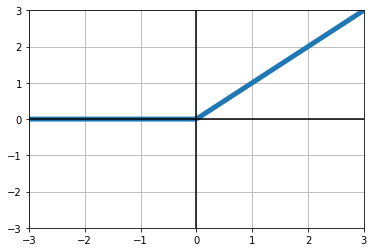

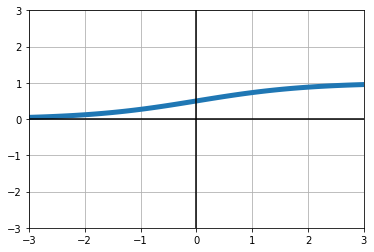

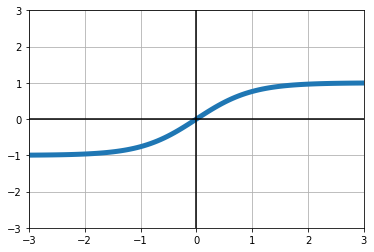

In [23]:
xs=torch.linspace(-3,3,100)
ys=torch.relu(xs)
plot(xs.numpy(),ys.numpy())
ys=torch.sigmoid(xs)
plot(xs.numpy(),ys.numpy())
ys=torch.tanh(xs)
plot(xs.numpy(),ys.numpy())

In [130]:
x=torch.Tensor(([2,3.5],[4,4]))
torch.softmax(x,dim=-1)# Do softmax along last dimension (by row)

tensor([[0.1824, 0.8176],
        [0.5000, 0.5000]])

In [131]:
shape=(3,)
x=torch.tensor([1.0,2,3],requires_grad=True)
y=torch.ones(shape,requires_grad=True)

In [132]:
x

tensor([1., 2., 3.], requires_grad=True)

In [26]:
x.data

tensor([1., 2., 3.])

In [27]:
print(x.grad)

None


In [133]:
loss=((2*x+y)**2).sum()
print(loss)

tensor(83., grad_fn=<SumBackward0>)


In [134]:
grad_fns=[(loss.grad_fn,0)]
curr_level=0
lines=[]
while grad_fns:
    prev_level=curr_level
    fn,curr_level=grad_fns.pop()
    if curr_level!=prev_level:
        print("----")
    print(fn.name())
    for next_fn,_ in fn.next_functions:
        if next_fn:
            grad_fns.append((next_fn,curr_level+1))

SumBackward0
----
PowBackward0
----
AddBackward0
----
torch::autograd::AccumulateGrad
MulBackward0
----
torch::autograd::AccumulateGrad


In [135]:
loss.backward()

In [136]:
print(x.grad)
print(y.grad)

tensor([12., 20., 28.])
tensor([ 6., 10., 14.])


In [137]:
loss2=((x*x+y)**2).sum()
loss2.backward()

In [139]:
print(x.grad)
print(y.grad)

tensor([ 20.,  60., 148.])
tensor([10., 20., 34.])


In [144]:
other_loss=(x**2).sum()
other_loss.backward()

In [145]:
print(x.grad)
print(y.grad)

tensor([14., 24., 34.])
None


In [146]:
shape=(3,)
x=torch.tensor([1.,2,3],requires_grad=True)
y=torch.ones(shape)
loss=((2*x+y)**2).sum()
loss.backward()
print(x.grad)
print(y.grad)

tensor([12., 20., 28.])
None


In [147]:
shape=(3,)
x=torch.tensor([1.,2,3],requires_grad=True)
y=torch.ones(shape)
y.requires_grad=True
y_detached=y.detach()# actually it shares memory
loss=((2*x+y)**2).sum()
loss.backward()
print(x.grad)
print(y_detached.grad)
print(y.grad)

tensor([12., 20., 28.])
None
tensor([ 6., 10., 14.])


In [38]:
y.detach().clone() # it is actually a copy no memory shared

tensor([1., 1., 1.])

## Ejemplo manual

In [206]:
# D=3 N=4
x=torch.Tensor(([1,.25,0.26],[0.75,0.125,0.1],[0.5,0.25,0.12],[0.65,0.135,0.2]))
print(x)

tensor([[1.0000, 0.2500, 0.2600],
        [0.7500, 0.1250, 0.1000],
        [0.5000, 0.2500, 0.1200],
        [0.6500, 0.1350, 0.2000]])


In [207]:
y=torch.Tensor(([[1],[0],[0],[1]]))
print(y)

tensor([[1.],
        [0.],
        [0.],
        [1.]])


In [208]:
θ=torch.randn((3,1))*0.1
θ.requires_grad=True
print(θ)

tensor([[-0.1773],
        [ 0.0221],
        [ 0.0085]], requires_grad=True)


In [209]:
lin=x@θ
print(lin)

tensor([[-0.1696],
        [-0.1294],
        [-0.0821],
        [-0.1106]], grad_fn=<MmBackward>)


In [210]:
f=torch.sigmoid(lin)
print(f)

tensor([[0.4577],
        [0.4677],
        [0.4795],
        [0.4724]], grad_fn=<SigmoidBackward>)


In [211]:
r=(f-y)
print(r)

tensor([[-0.5423],
        [ 0.4677],
        [ 0.4795],
        [-0.5276]], grad_fn=<SubBackward0>)


In [212]:
loss=(r**2).sum()
print(loss)

tensor(1.0211, grad_fn=<SumBackward0>)


In [213]:
loss.backward()

In [214]:
θ.grad

tensor([[-0.1458],
        [-0.0139],
        [-0.0706]])

In [220]:
α=0.1
θ.data=θ.data-α*θ.grad
print(θ.data)
print(θ.grad)

tensor([[-0.1336],
        [ 0.0263],
        [ 0.0297]])
tensor([[-0.1458],
        [-0.0139],
        [-0.0706]])


In [221]:
lin=x@θ
print(lin)

tensor([[-0.1193],
        [-0.0939],
        [-0.0567],
        [-0.0773]], grad_fn=<MmBackward>)


In [222]:
f=torch.sigmoid(lin)
print(f)

tensor([[0.4702],
        [0.4765],
        [0.4858],
        [0.4807]], grad_fn=<SigmoidBackward>)


In [223]:
r=(f-y)
print(r)

tensor([[-0.5298],
        [ 0.4765],
        [ 0.4858],
        [-0.5193]], grad_fn=<SubBackward0>)


In [224]:
loss=(r**2).sum()
print(loss)

tensor(1.0135, grad_fn=<SumBackward0>)


# pyTorch Neural Networks

torch.Size([100, 1])


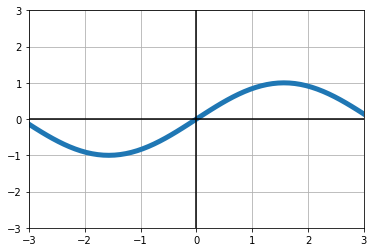

In [226]:
x=torch.linspace(-5,5,100).view(100,1)
print(x.shape)
y_target=torch.sin(x)
loss_fn=nn.MSELoss()
plot(x,y_target)

In [227]:
class Net(nn.Module):
    def __init__(self,input_size,output_size):
        super(Net,self).__init__()
        self.fc1=nn.Linear(input_size,32)
        self.fc2=nn.Linear(32,32)
        self.fc3=nn.Linear(32,output_size)
    def forward(self,x):
        h1=F.relu(self.fc1(x))
        h2=F.relu(self.fc2(h1))
        y=self.fc3(h2)
        return y

In [228]:
net=Net(input_size=1,output_size=1)
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


In [229]:
y=net(x)
print(y.shape)

torch.Size([100, 1])


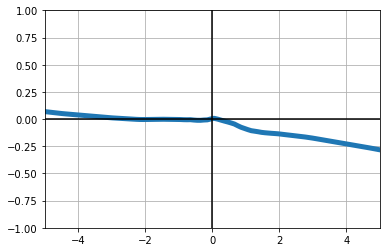

In [230]:
plot(x.detach().numpy(),y.detach().numpy(),ylim=(-1,1),xlim=(-5,5))

In [231]:
for name,p in net.named_parameters():
    print(name,"\t",p.shape)

fc1.weight 	 torch.Size([32, 1])
fc1.bias 	 torch.Size([32])
fc2.weight 	 torch.Size([32, 32])
fc2.bias 	 torch.Size([32])
fc3.weight 	 torch.Size([1, 32])
fc3.bias 	 torch.Size([1])


In [232]:
print(net.fc1.bias.grad)

None


In [233]:
loss=((y-y_target)**2).sum()
print(loss)
print(loss.data)

tensor(51.2876, grad_fn=<SumBackward0>)
tensor(51.2876)


In [234]:
loss.backward()

In [237]:
for p in net.parameters():
    p.data.add(-0.001*p.grad)
    p.grad.data.zero_()

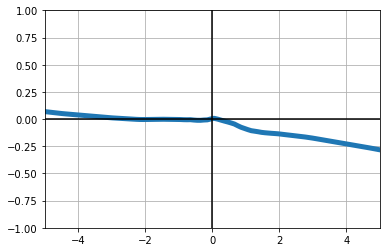

In [238]:
plot(x.detach().numpy(),y.detach().numpy(),ylim=(-1,1),xlim=(-5,5))

In [239]:
for _ in range(100):
    y=net(x)
    loss=((y-y_target)**2).sum()
    loss.backward()
    for p in net.parameters():
        p.data.add_(-0.001*p.grad)
        p.grad.data.zero_()

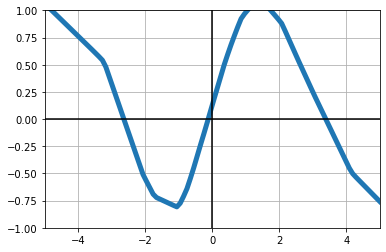

In [240]:
plot(x.detach().numpy(),y.detach().numpy(),ylim=(-1,1),xlim=(-5,5))

In [241]:
loss_fn=nn.MSELoss()
loss_fn(torch.Tensor([1.4,3.3,1.9]),torch.Tensor([1,3,2]))

tensor(0.0867)

In [246]:
net=Net(input_size=1,output_size=1)
for _ in range(1000):
    y=net(x)
    loss=loss_fn(y,y_target)
    loss.backward()
    for p in net.parameters():
        p.data.add_(-0.001*p.grad)
        p.grad.data.zero_()

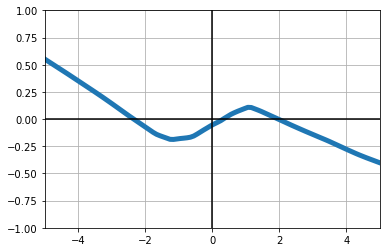

In [248]:
plot(x.detach().numpy(),y.detach().numpy(),ylim=(-1,1),xlim=(-5,5))

In [250]:
net=Net(input_size=1,output_size=1)
optimizer=optim.Adam(net.parameters(),lr=1e-3)

x=torch.linspace(-5,5,100).view(100,1)
y=net(x)
y_target=torch.sin(x)
loss_fn=nn.MSELoss()

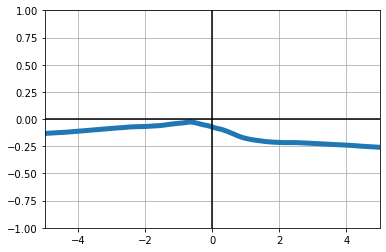

In [251]:
plot(x.detach().numpy(),y.detach().numpy(),ylim=(-1,1),xlim=(-5,5))

In [252]:
for _ in range(100):
    y=net(x)
    loss=loss_fn(y,y_target)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

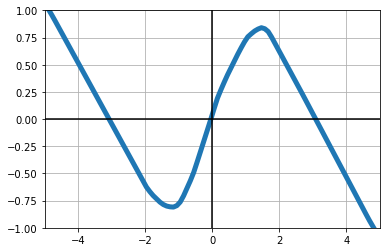

In [253]:
plot(x.detach().numpy(),y.detach().numpy(),ylim=(-1,1),xlim=(-5,5))

# pyTorch CUDA

In [231]:
print(torch.cuda.is_available())

True


In [232]:
device=torch.device("cuda")
y=torch.ones((2,3),device=device)
print(y)

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


In [38]:
device=torch.device("cuda")
x=torch.zeros((2,3))
y=torch.ones((2,3),device=device)
x=x.to(device)
z=x+y
print(z)

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


In [39]:
z.numpy()

TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [235]:
z_cpu=z.to("cpu")
z_cpu.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

# pyTorch Distributions

In [236]:
mean=torch.zeros(1,requires_grad=True)
std=torch.ones(1,requires_grad=True)
gaussian=distributions.Normal(mean,std)

In [237]:
samples=gaussian.sample((10,))
print(samples)

tensor([[-1.1572],
        [-0.0663],
        [-1.0275],
        [-1.2524],
        [ 0.1197],
        [-0.5502],
        [-1.5589],
        [-0.6246],
        [ 0.8434],
        [ 1.0737]])


In [238]:
log_prob=gaussian.log_prob(samples)
print(log_prob)

tensor([[-1.5885],
        [-0.9211],
        [-1.4468],
        [-1.7032],
        [-0.9261],
        [-1.0703],
        [-2.1340],
        [-1.1140],
        [-1.2746],
        [-1.4954]], grad_fn=<SubBackward0>)


In [239]:
loss=-log_prob.sum()

In [240]:
print(loss)

tensor(13.6741, grad_fn=<NegBackward>)


In [241]:
loss.backward()

In [242]:
print(std.grad)
print(mean.grad)

tensor([1.0306])
tensor([4.2003])


In [243]:
probs=torch.tensor([0.1,0.2,0.7],requires_grad=True)

In [244]:
dist=distributions.Categorical(probs=probs)

In [245]:
samples=dist.sample([20])
print(samples)

tensor([1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [246]:
dist.log_prob(samples)

tensor([-1.6094, -0.3567, -0.3567, -1.6094, -0.3567, -0.3567, -0.3567, -0.3567,
        -0.3567, -2.3026, -0.3567, -0.3567, -0.3567, -0.3567, -0.3567, -0.3567,
        -0.3567, -0.3567, -0.3567, -0.3567], grad_fn=<SqueezeBackward1>)

In [252]:
class GaussianPolicy(nn.Module):
    def __init__(self,input_size, output_size):
        super(GaussianPolicy,self).__init__()
        self.mean_fc1=nn.Linear(input_size,32)
        self.mean_fc2=nn.Linear(32,32)
        self.mean_fc3=nn.Linear(32,output_size)
        self.log_std=nn.Parameter(torch.rand(output_size))
    def forward(self,x):
        h1=F.relu(self.mean_fc1(x))
        h2=F.relu(self.mean_fc2(h1))
        mean=self.mean_fc3(h2)
        return mean,self.log_std

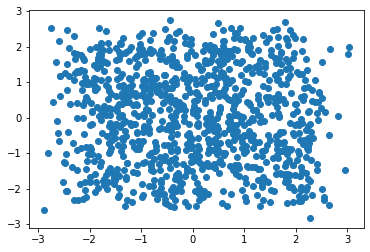

In [253]:
states=torch.rand(1000,2)-0.5
true_means=states**3+4.5*states
true_cov=torch.diag(torch.Tensor([0.1,0.05]))
expert_actions=torch.distributions.MultivariateNormal(true_means,true_cov).sample()
plt.scatter(expert_actions[:,0],expert_actions[:,1])

In [270]:
from torch.utils.data import DataLoader, TensorDataset
policy=GaussianPolicy(2,2)
optimizer=optim.Adam(policy.parameters(),lr=0.01)
dataset=TensorDataset(states,expert_actions)
loader=DataLoader(dataset,batch_size=64,shuffle=True)

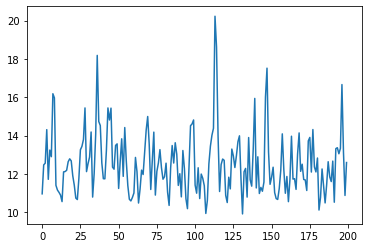

In [271]:
losses=[]
for epoch in range(200):
    epoch_loss=0
    for curr_states, curr_actions in loader:
        mean, log_std=policy(curr_states)
        dist=torch.distributions.Normal(mean,torch.exp(log_std))
        loss=-dist.log_prob(curr_actions).sum()
        
        optimizer.zero_grad()
        loss.backward()
        epoch_loss+=loss.detach().cpu().numpy().squeeze()
        optimizer.step()
    losses.append(epoch_loss/len(loader))
plt.plot(losses)

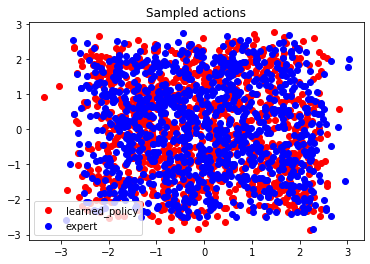

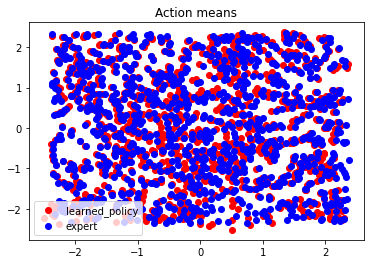

In [272]:
policy.eval()
with torch.no_grad():
    mean, log_std=policy(states)
    dist=torch.distributions.Normal(mean,torch.exp(log_std))
    pred_means=dist.mean.cpu().numpy()
    pred_actions=dist.sample().cpu().numpy()
plt.figure()
plt.title("Sampled actions")
plt.scatter(pred_actions[:,0],pred_actions[:,1],color="r",label="learned_policy")
plt.scatter(expert_actions[:,0],expert_actions[:,1],color="b",label="expert")
plt.legend()
plt.figure()
plt.title("Action means")
plt.scatter(pred_means[:,0],pred_means[:,1],color="r",label="learned_policy")
plt.scatter(true_means[:,0],true_means[:,1],color="b",label="expert")
plt.legend()
                            